In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory|
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.metrics import accuracy_score, classification_report
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-loan-approval-lr-dt-rf-and-auc/bankloan.csv


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from plotly.offline import iplot , plot 
from imblearn.over_sampling import SMOTE
from plotly.subplots import make_subplots
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve

In [7]:
#reading the csv file
df = pd.read_csv('/kaggle/input/bank-loan-approval-lr-dt-rf-and-auc/bankloan.csv')

In [8]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no null values in the dataset. Of the 14 columns, all the columns except 'CCAvg' have integer datatype. The column 'CCAvg' has float data type.

Further we can check for the presence of null values using the isnull() method

In [10]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

The column 'ID' and 'ZIP.Code' are irrelevant, so we drop it.

In [11]:
df = df.drop(['ID','ZIP.Code'],axis = 1)

In [12]:
df[df['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


We can see that in the 'Experience' column some datas are absurd. Experience of a person is recorded in years so, it cannot be negative. 

In [15]:
#using abs() method to convert negative values to positive values in the 'Experience' column
df['Experience'] = abs(df['Experience'])

In [16]:
#rechecking if there are any negative values present
df[df['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard


### Summary Statistics

We summarise only the descriptive statistical measures of the 5 features namely,'Age','Experience','Income','CCAvg' and 'Mortgage' because all the other features have categorical data. 

In [17]:
df[['Age','Experience','Income','CCAvg','Mortgage']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


According to the results,
- The mean age of a customer is 45.338400 years with a standard deviation of 11.463166. The median age is 45 years. The age range is 23-67.
- A customer is considered to have 20.1346 years of experience on an average, with a standard deviation of 11.415189. 
- The average annual income of a customer is 73,774.200 dollars. The income is ranging from 8,000 dollars to 224,000 dollars.
- The mean Credit Card Average Score of a customer is 1.937938 with a standard deviation of 1.747659. The median Credit Card Average Score is 1.5.
- The customer is considered to have taken a mortgage of 56498.800 dollaars on an average. The highest mortgage value taken by a customer is 635000 dollars.

In [18]:
#checking for the column names
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account',
       'Online', 'CreditCard'],
      dtype='object')

Checking for any duplicated data.

In [19]:
df.duplicated().sum()

13

In [20]:
df.drop_duplicates()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


## Exploratory Data Analysis

According to the dataset, the bank loan for 480 customers have been approved while that of 4520 customers have been denied. We visualize the data using a count plot as shown below.

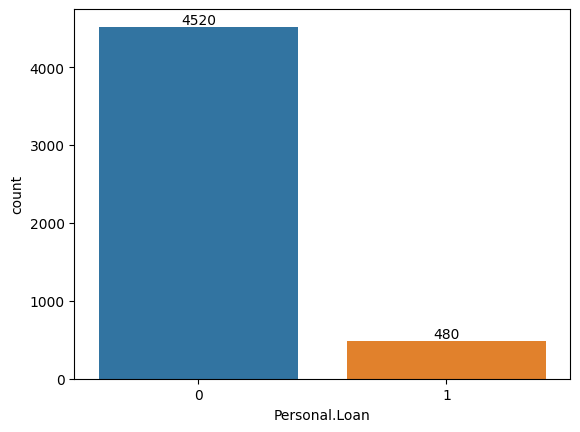

In [21]:
ax= sns.countplot(data = df, x = 'Personal.Loan')
for i in ax.containers:
    ax.bar_label(i,)

After the EDA is done, we will built models considering this feature(Personal.Loan) as the target variable. But we notice that the dataset is highly imbalanced. So later on, before model building we will take appropriate measures in order to make the data balanced. For now, we carry out with the rest of the EDA.

We do the same with the the features- Family, Education, Online, Securities.Account, CD.Account, CreditCard.

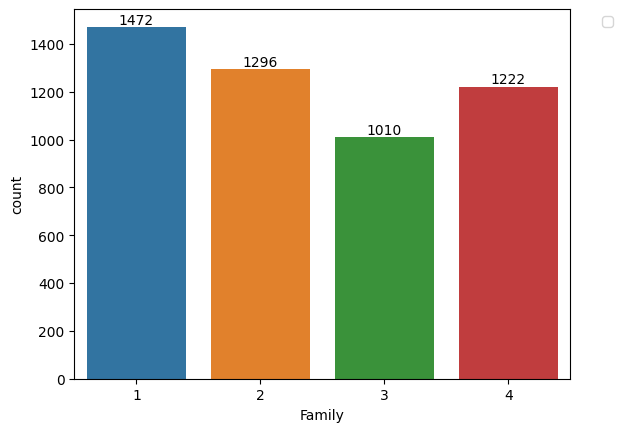

In [22]:
ax=sns.countplot(data=df,x="Family")
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Of the 5000 customers, 1472 customers have only 1 member in their family, 1296 customers have 2 members in their family, 1010 customers have 3 members in their family and 1222 customers have 4 members in their family.

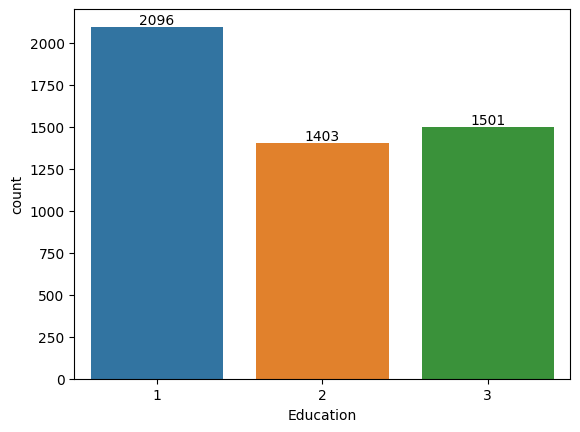

In [23]:
ax=sns.countplot(data = df, x ='Education')
for i in ax.containers:
    ax.bar_label(i,)

As it is given, '1' corresponds to Bachelor's degree, '2' corresponds to Master's degree and '3' to Adanced degree, so of the 5000 customers, the highest education qualification achieved by 2096 customers is Bachelor's degree, 1403 customers have done master's degree, while 1501 customers have done advanced degree.

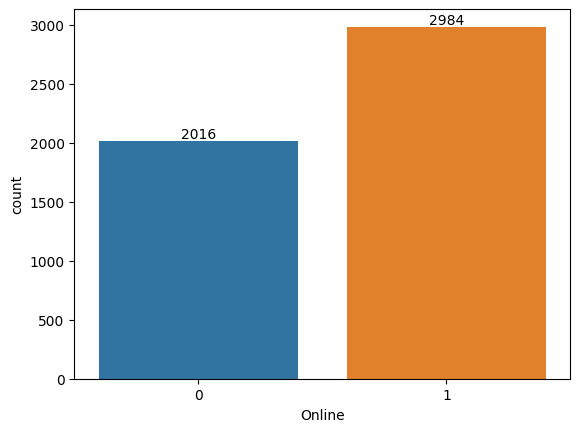

In [24]:
ax=sns.countplot(data=df,x='Online')
for i in ax.containers:
    ax.bar_label(i,)

The above countplot shows that 2984 customers have online banking while 2016 do not have online banking.

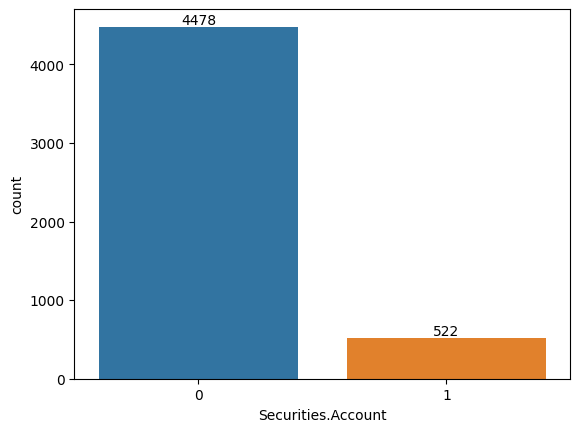

In [25]:
ax = sns.countplot(data=df,x='Securities.Account')
for i in ax.containers:
    ax.bar_label(i,)

The data shows that 4478 customers do not have a Securities Account while 522 customers have a Securities Account.

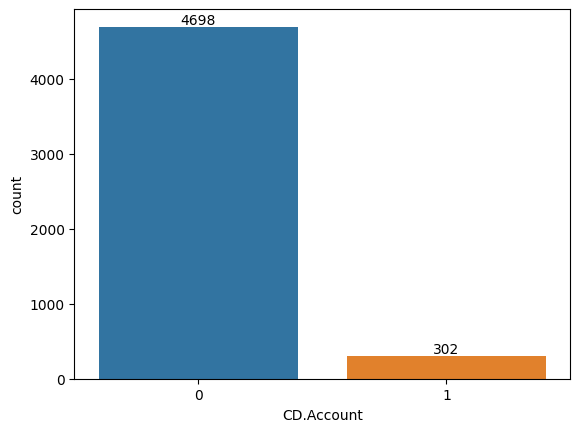

In [26]:
ax = sns.countplot(data=df,x='CD.Account')
for i in ax.containers:
    ax.bar_label(i,)

Of the 5000 entries, 4698 customers do not have a CD Account, while 302 have a CD Account.

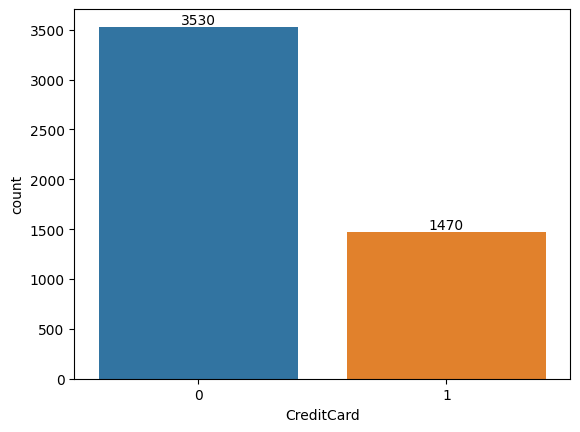

In [27]:
ax = sns.countplot(data=df,x='CreditCard')
for i in ax.containers:
    ax.bar_label(i,)

Of the 5000 entries, 3530 customers do not have a Credit Card, while 1470 have a Credit Card.

## Outliers Detection

Now we plot the histograms of the columns Age, Experience, Mortgage, CCAvg, Income to see and compare their distributions.

<Axes: xlabel='Income', ylabel='Count'>

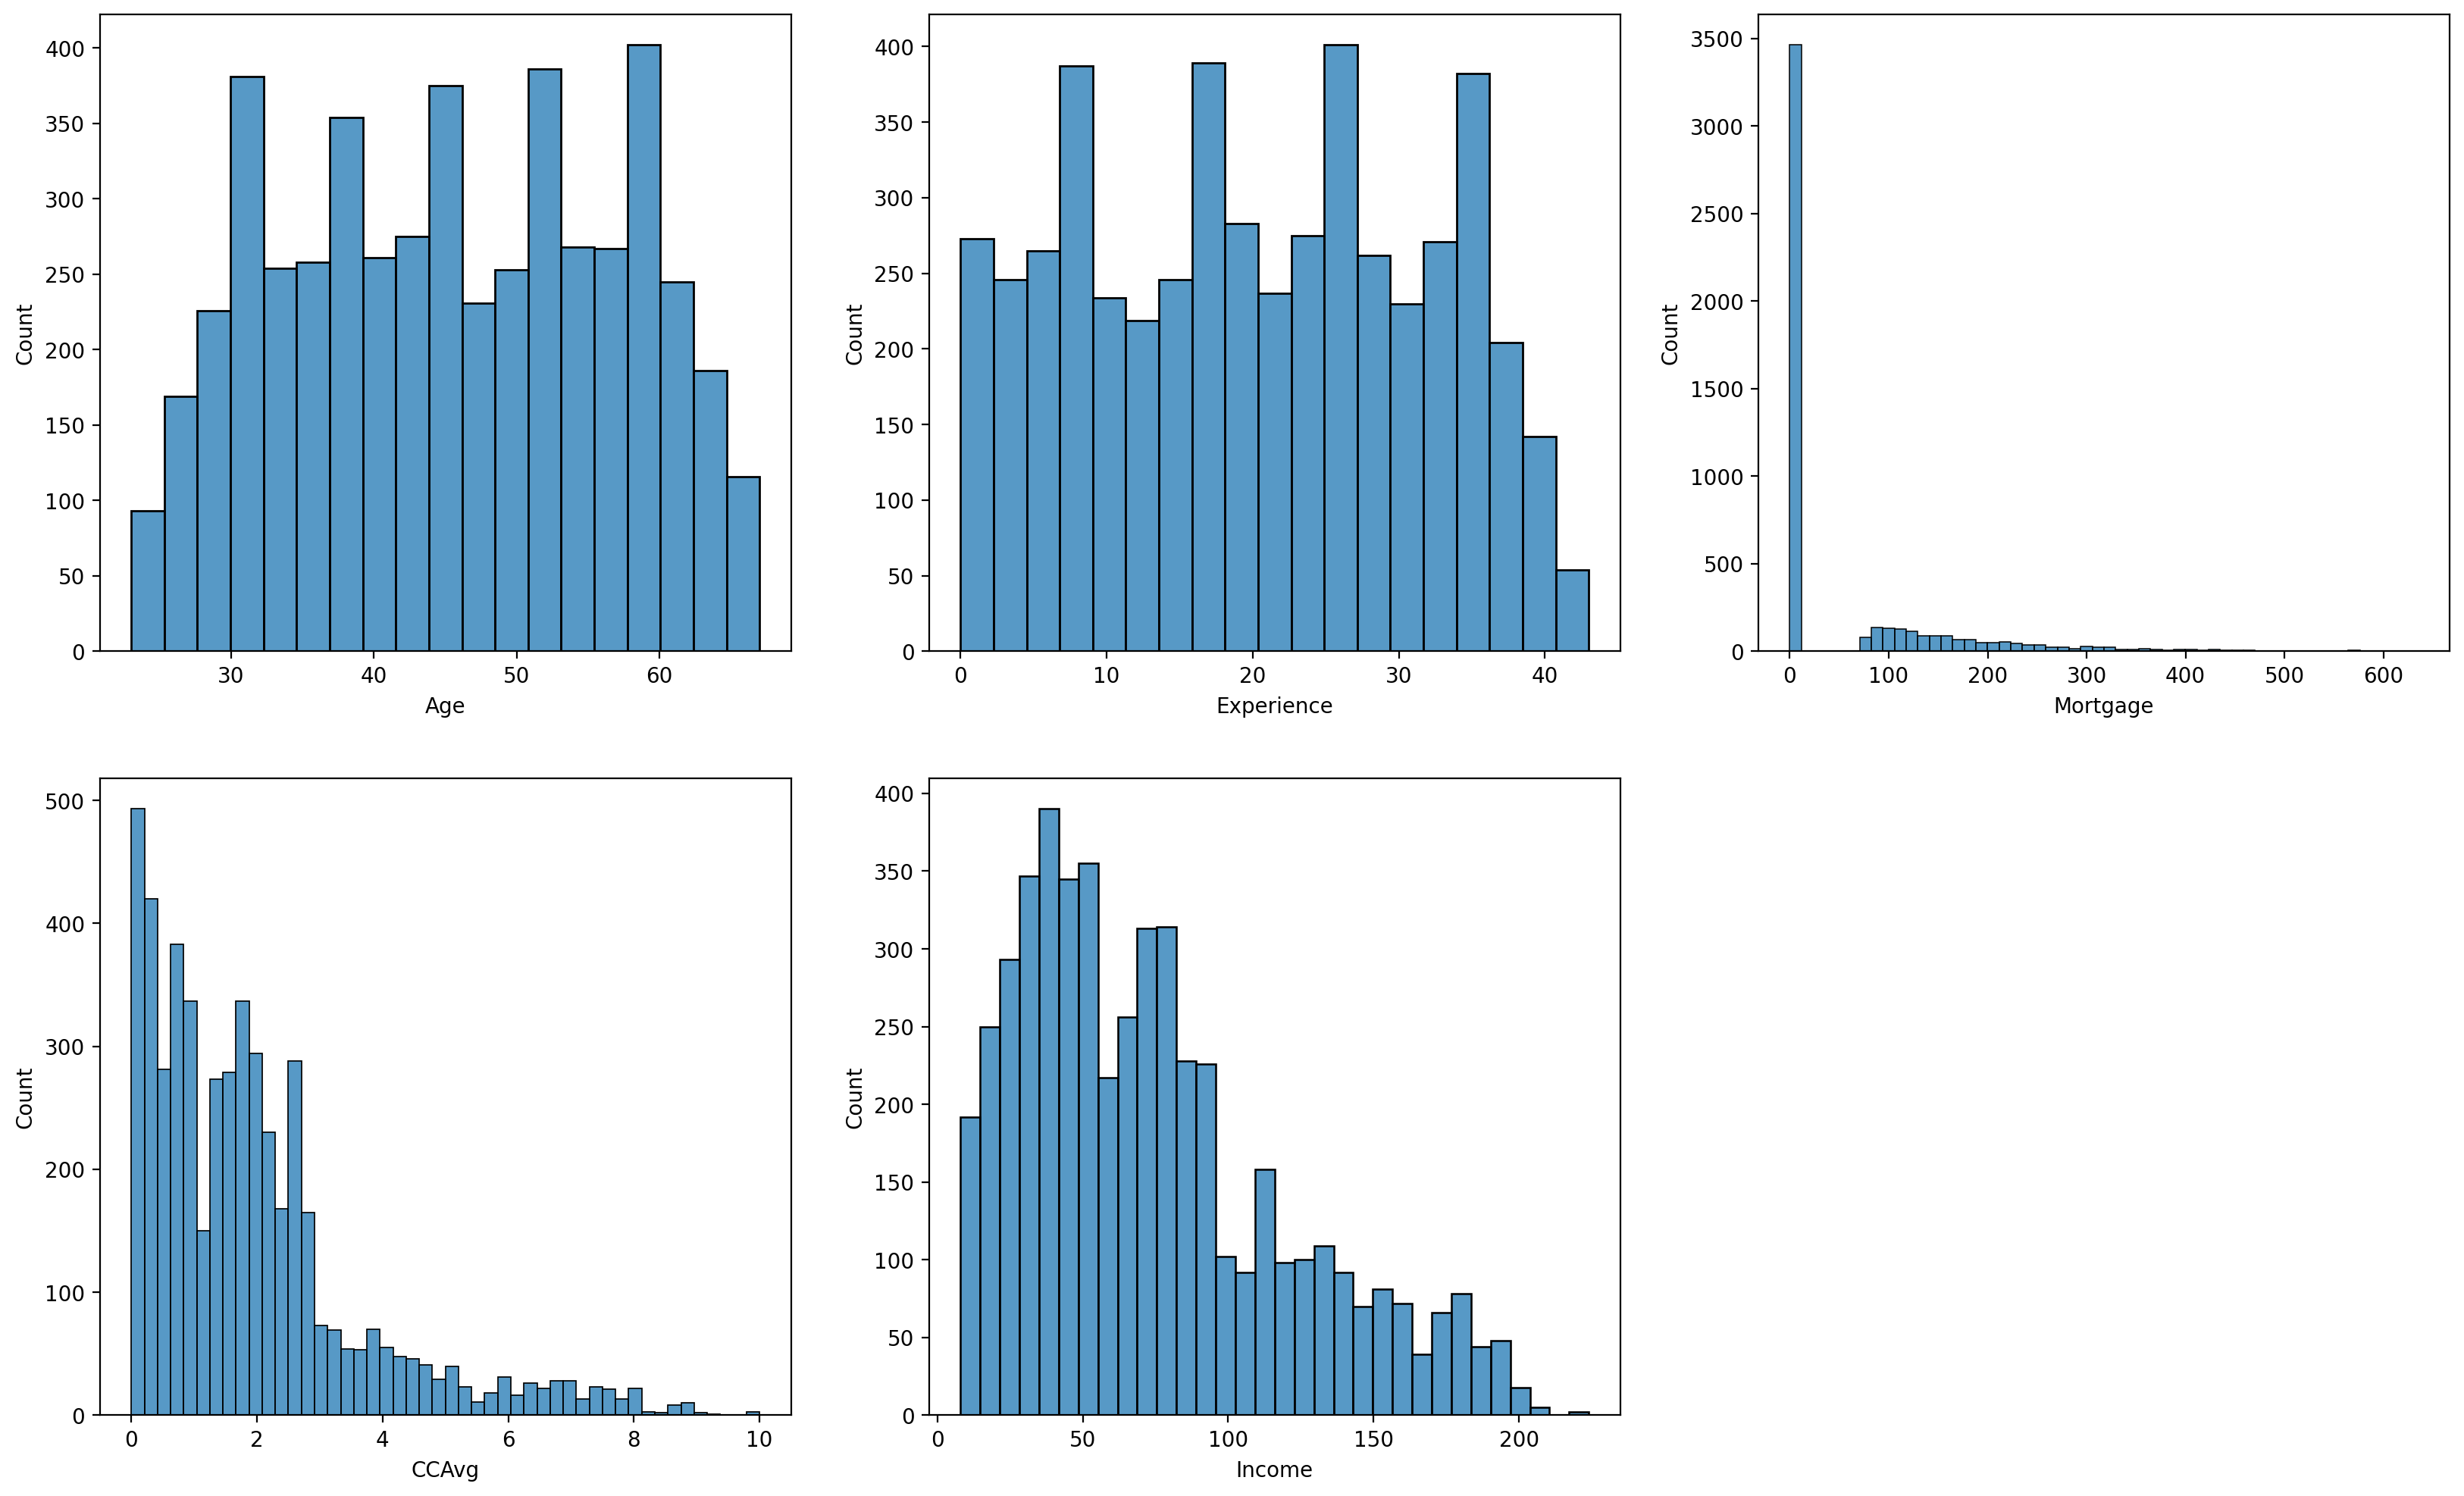

In [28]:
plt.figure(figsize=(20,12),dpi=200)

plt.subplot(2,3,1)
sns.histplot(data=df,x='Age')

plt.subplot(2,3,2)
sns.histplot(data=df,x='Experience')

plt.subplot(2,3,3)
sns.histplot(data=df,x='Mortgage')

plt.subplot(2,3,4)
sns.histplot(data=df,x='CCAvg')

plt.subplot(2,3,5)
sns.histplot(data=df,x='Income')



In [29]:
df_cont = df[['Age','Experience','Mortgage','CCAvg','Income']]
df_cont.skew()

Age          -0.029341
Experience   -0.010038
Mortgage      2.104002
CCAvg         1.598443
Income        0.841339
dtype: float64

We notice that the features Mortgage, CCAvg, and Income have some skewness. We use Box PLots to summarize the data of these features and see how they are distributed and whether they contain any outliers or not.

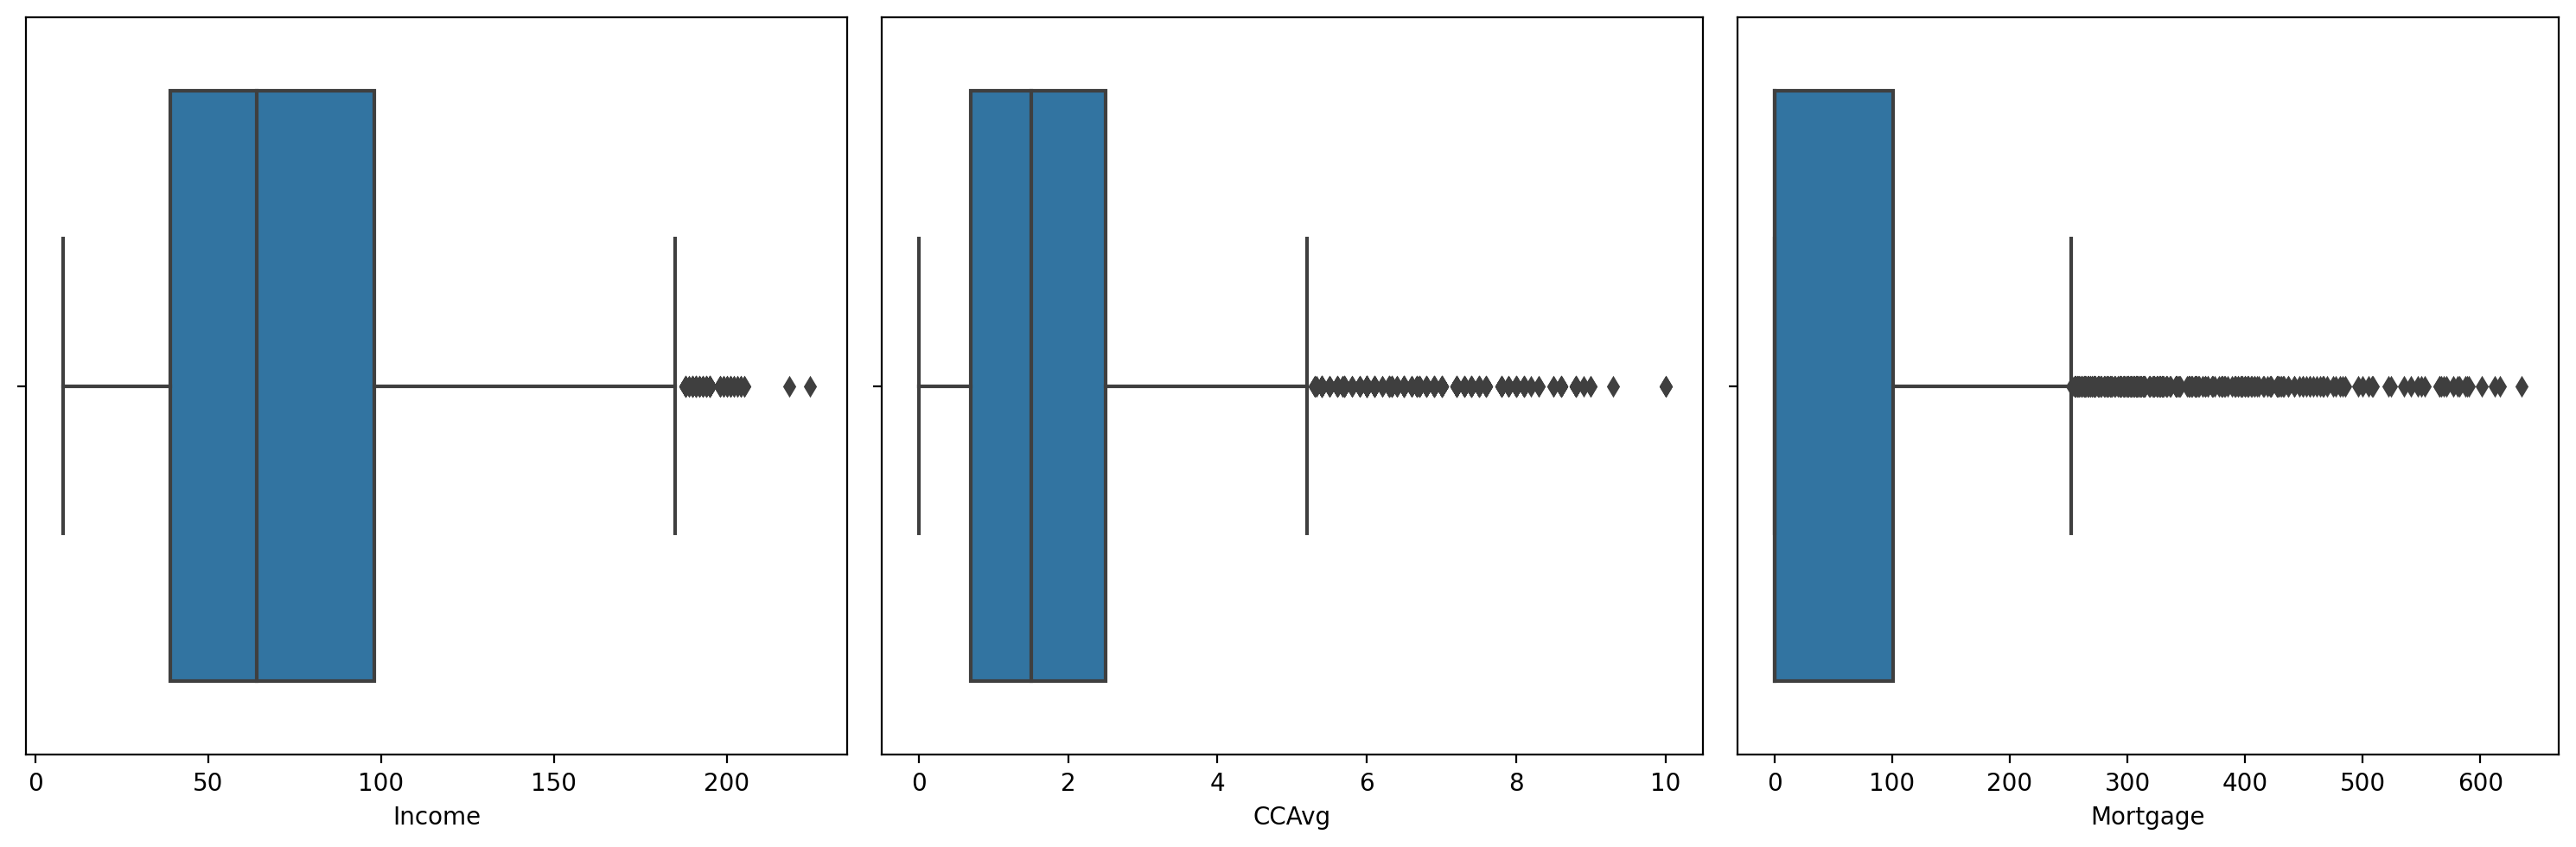

In [30]:
plt.figure(figsize = (15,5),dpi = 200)

plt.subplot(1,3,1)
sns.boxplot(x = 'Income', data = df)

plt.subplot(1,3,2)
sns.boxplot(x ='CCAvg', data = df)

plt.subplot(1,3,3)
sns.boxplot(x ='Mortgage', data = df)

plt.tight_layout()

We can see that these three features have outliers. In order to deal with these outliers we use the sqaure root transformation since the distribution of these three columns are positively skewed.

In [31]:
df['Income'] = np.sqrt(df['Income'])
df['CCAvg'] = np.sqrt(df['CCAvg'])
df['Mortgage'] = np.sqrt(df['Mortgage'])

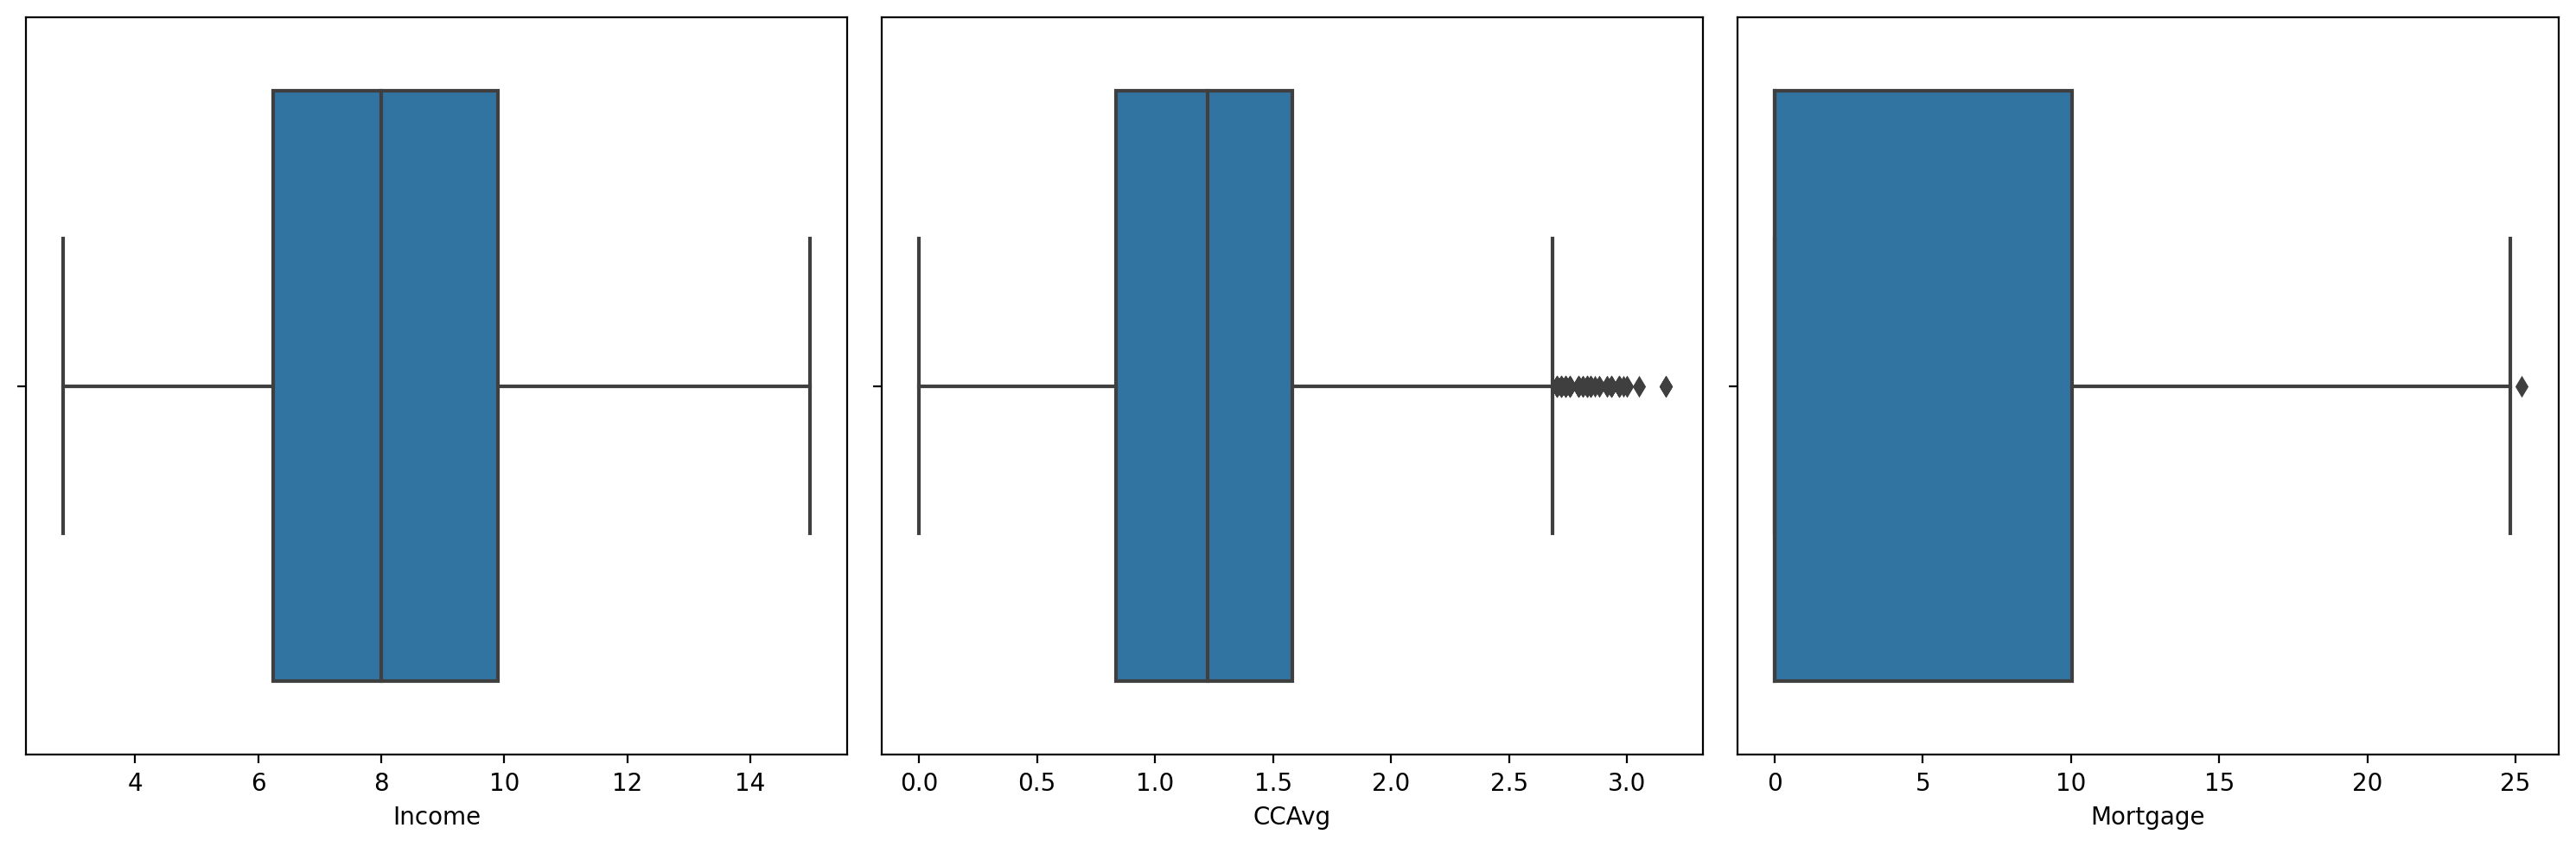

In [32]:
plt.figure(figsize = (15,5),dpi = 200)

plt.subplot(1,3,1)
sns.boxplot(x = 'Income', data = df)

plt.subplot(1,3,2)
sns.boxplot(x ='CCAvg', data = df)

plt.subplot(1,3,3)
sns.boxplot(x ='Mortgage', data = df)

plt.tight_layout()

Income and Mortgage has no significant outliers, but CCAvg has some. SO, now we try to control them.

In [33]:
Q1 = df['CCAvg'].quantile(0.25)
Q3 = df['CCAvg'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [34]:
df.loc[df['CCAvg'] <= LL]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard


The above result shows that there are no outliers that lie beyond the lower limit. Also from the box plot of CCAvg we can notice that all the outliers lie beyond the upper limit. So, we replace the latter ones with the upper limit.

In [35]:
#replacing the outliers with the upper limit
df.loc[df['CCAvg'] >= UL,'CCAvg'] = UL

<Axes: xlabel='CCAvg'>

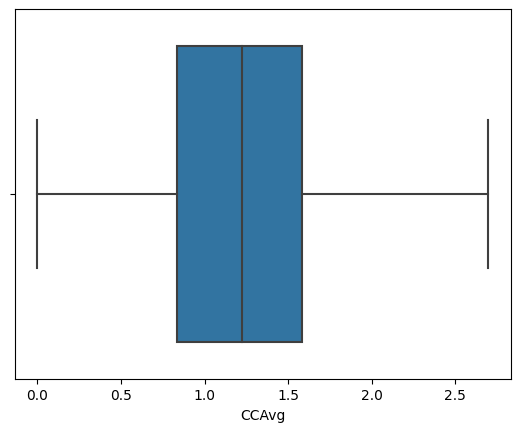

In [36]:
#rechecking whether our process worked correctly or not.
sns.boxplot(x ='CCAvg', data = df)

We see that there are no outliers left so we use this transformed data to carry out the rest of the analysis.

Checking the Correlation between various features using a heatmap.

<Axes: >

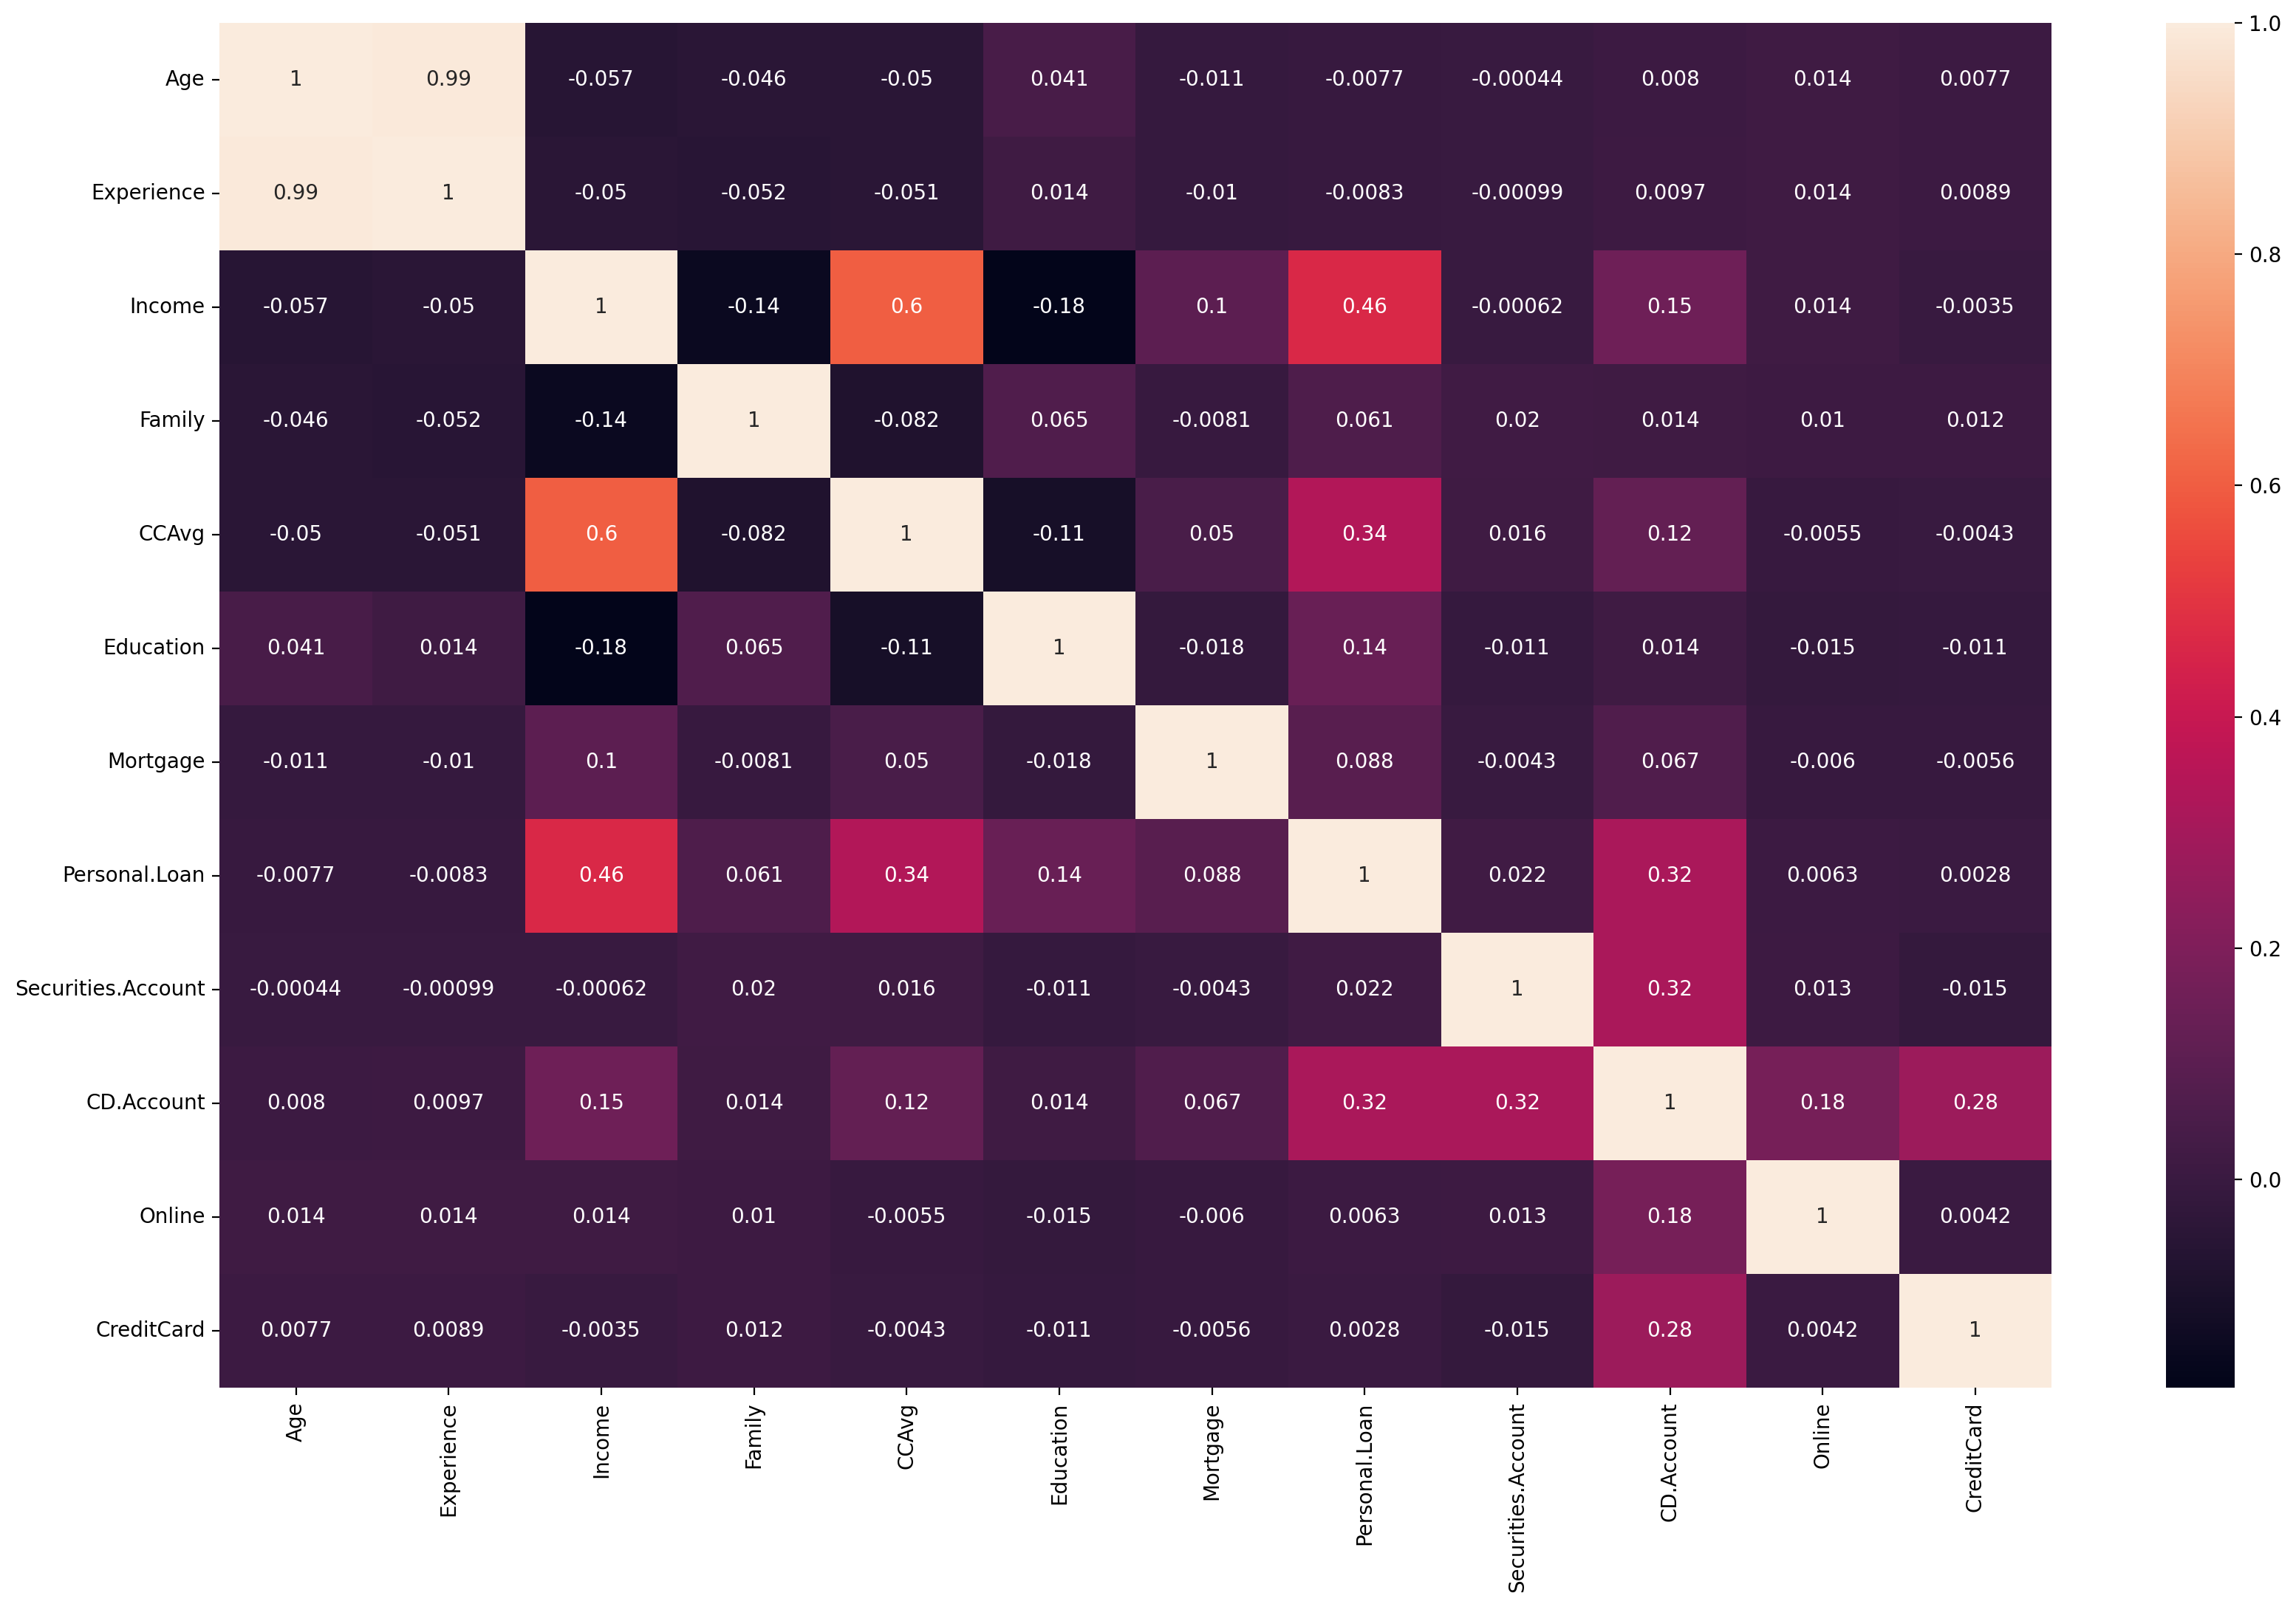

In [37]:
plt.figure(figsize=(20,12),dpi=200)
sns.heatmap(df.corr(),annot=True)

### Interpretation of heatmap

- Age is highly correlated with Experience. As age of a customer increases, there is a rapid increase in his experience. 
- There is some correlation (0.6) between Income and Credit Card Average Score. The increase in Income will affect the Credit Card Average Score positively and vice versa.
- The correlation between Income and whether a customer gets personal loan is 0.46.
- Rest of the features have little to neglible correlation with the other features.
- Each feature is perfectly correlated with itself.

## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
from collections import Counter
from imblearn.combine import SMOTETomek

In [54]:
y = df['Personal.Loan']
x = df.drop(['Personal.Loan'],axis=1)

In [55]:
sm = SMOTETomek()
X,Y = sm.fit_resample(x,y)

In [56]:
Y.value_counts()

Personal.Loan
0    4520
1    4520
Name: count, dtype: int64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# **LogisticRegression**

In [61]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=200)

# Train the model
lr_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=4))

Accuracy: 0.8866
Classification Report:
              precision    recall  f1-score   support

           0     0.9055    0.8781    0.8916       960
           1     0.8666    0.8962    0.8812       848

    accuracy                         0.8866      1808
   macro avg     0.8860    0.8872    0.8864      1808
weighted avg     0.8872    0.8866    0.8867      1808



In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.8866
Precision: 0.8666
Recall: 0.8962
F1 Score: 0.8812
Specificity: 0.8781
Cohen's Kappa: 0.7728
Matthews Correlation Coefficient (MCC): 0.7732


AUC: 0.9530


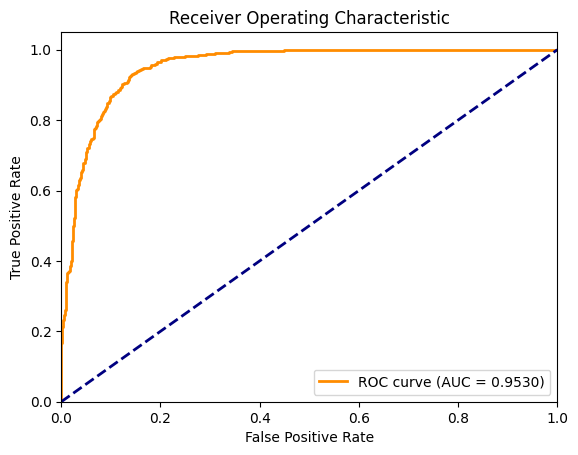

In [65]:
y_pred_proba = lr_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **SVM**

In [66]:
from sklearn.svm import SVC
svm_model =SVC(probability=True)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9297    0.8271    0.8754       960
           1     0.8260    0.9292    0.8746       848

    accuracy                         0.8750      1808
   macro avg     0.8779    0.8782    0.8750      1808
weighted avg     0.8811    0.8750    0.8750      1808



In [67]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.8750
Precision: 0.8260
Recall: 0.9292
F1 Score: 0.8746
Specificity: 0.8271
Cohen's Kappa: 0.7509
Matthews Correlation Coefficient (MCC): 0.7560


AUC: 0.9300


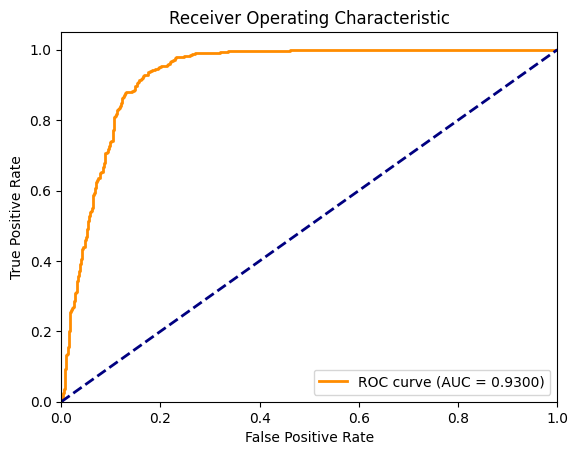

In [68]:
y_pred_proba = svm_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Random Forest**

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9854    0.9875    0.9865       960
           1     0.9858    0.9835    0.9847       848

    accuracy                         0.9856      1808
   macro avg     0.9856    0.9855    0.9856      1808
weighted avg     0.9856    0.9856    0.9856      1808



In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9856
Precision: 0.9858
Recall: 0.9835
F1 Score: 0.9847
Specificity: 0.9875
Cohen's Kappa: 0.9711
Matthews Correlation Coefficient (MCC): 0.9711


AUC: 0.9985


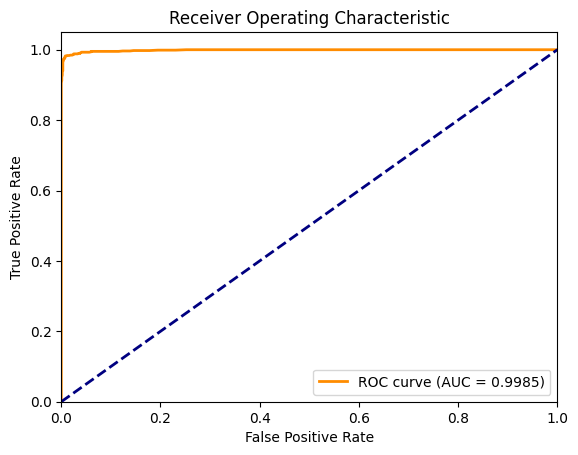

In [71]:
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **XGB**

In [75]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9875    0.9854    0.9864       960
           1     0.9835    0.9858    0.9847       848

    accuracy                         0.9856      1808
   macro avg     0.9855    0.9856    0.9856      1808
weighted avg     0.9856    0.9856    0.9856      1808



In [73]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9856
Precision: 0.9835
Recall: 0.9858
F1 Score: 0.9847
Specificity: 0.9854
Cohen's Kappa: 0.9711
Matthews Correlation Coefficient (MCC): 0.9711


AUC: 0.9991


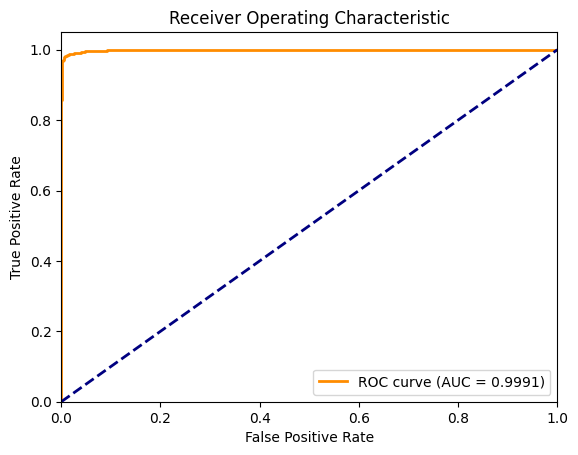

In [74]:
y_pred_proba = xgb_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ****Catboost****

In [76]:
import catboost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=15000,  # Number of boosting iterations
    learning_rate=0.1,  # Learning rate
    depth=6,  # Depth of the trees
    loss_function='Logloss',  # Loss function for binary classification
    eval_metric='AUC',  # Evaluation metric
    cat_features=[]  # List of categorical features (if any)
)
catboost_model.fit(x_train, y_train, verbose=200)  # Train with verbose output every 200 iterations

# Predict on the test set
y_pred = catboost_model.predict(x_test)
y_pred_proba = catboost_model.predict_proba(x_test)[:, 1]  #

0:	total: 55.3ms	remaining: 13m 49s
200:	total: 730ms	remaining: 53.8s
400:	total: 1.37s	remaining: 50s
600:	total: 1.98s	remaining: 47.4s
800:	total: 2.53s	remaining: 44.9s
1000:	total: 3.06s	remaining: 42.7s
1200:	total: 3.58s	remaining: 41.1s
1400:	total: 4.11s	remaining: 39.9s
1600:	total: 4.63s	remaining: 38.8s
1800:	total: 5.15s	remaining: 37.8s
2000:	total: 5.67s	remaining: 36.9s
2200:	total: 6.2s	remaining: 36s
2400:	total: 6.74s	remaining: 35.4s
2600:	total: 7.36s	remaining: 35.1s
2800:	total: 7.92s	remaining: 34.5s
3000:	total: 8.47s	remaining: 33.9s
3200:	total: 8.98s	remaining: 33.1s
3400:	total: 9.49s	remaining: 32.4s
3600:	total: 10s	remaining: 31.7s
3800:	total: 10.6s	remaining: 31.1s
4000:	total: 11.1s	remaining: 30.4s
4200:	total: 11.6s	remaining: 29.7s
4400:	total: 12.1s	remaining: 29s
4600:	total: 12.6s	remaining: 28.4s
4800:	total: 13.1s	remaining: 27.8s
5000:	total: 13.6s	remaining: 27.2s
5200:	total: 14.1s	remaining: 26.6s
5400:	total: 14.6s	remaining: 25.9s
5600:

In [77]:
y_pred = catboost_model.predict(x_test)
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9896    0.9896    0.9896       960
           1     0.9882    0.9882    0.9882       848

    accuracy                         0.9889      1808
   macro avg     0.9889    0.9889    0.9889      1808
weighted avg     0.9889    0.9889    0.9889      1808



In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9889
Precision: 0.9882
Recall: 0.9882
F1 Score: 0.9882
Specificity: 0.9896
Cohen's Kappa: 0.9778
Matthews Correlation Coefficient (MCC): 0.9778


AUC: 0.9994


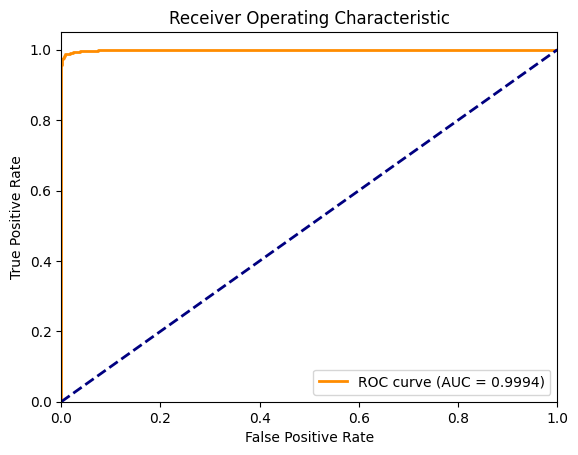

In [79]:
y_pred_proba = catboost_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **LGBMClassifier**

In [80]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    num_leaves=31,         # Number of leaves in one tree
    max_depth=-1,          # Maximum depth of tree (-1 means no limit)
    learning_rate=0.1,     # Learning rate
    n_estimators=100       # Number of boosting iterations
)
lgb_model.fit(x_train, y_train)
y_pred = lgb_model.predict(x_test)
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

[LightGBM] [Info] Number of positive: 3672, number of negative: 3560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 7232, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507743 -> initscore=0.030976
[LightGBM] [Info] Start training from score 0.030976
classification_report is                precision    recall  f1-score   support

           0     0.9875    0.9854    0.9864       960
           1     0.9835    0.9858    0.9847       848

    accuracy                         0.9856      1808
   macro avg     0.9855    0.9856    0.9856      1808
weighted avg     0.9856    0.9856    0.9856      1808



In [81]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9856
Precision: 0.9835
Recall: 0.9858
F1 Score: 0.9847
Specificity: 0.9854
Cohen's Kappa: 0.9711
Matthews Correlation Coefficient (MCC): 0.9711


AUC: 0.9991


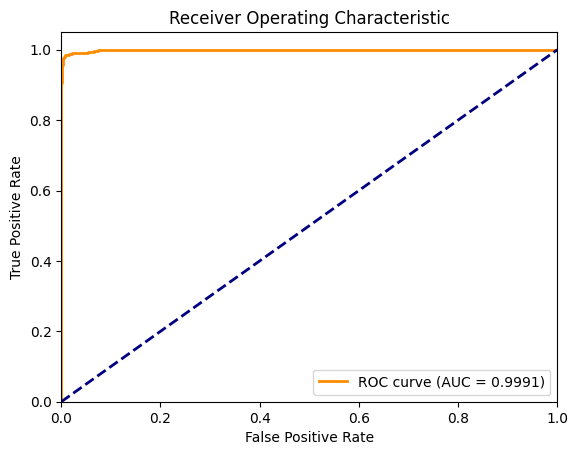

In [82]:
y_pred_proba = lgb_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **KNN**

In [83]:
from sklearn.neighbors import KNeighborsClassifier
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(x_test)
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9988    0.8865    0.9393       960
           1     0.8860    0.9988    0.9390       848

    accuracy                         0.9392      1808
   macro avg     0.9424    0.9426    0.9392      1808
weighted avg     0.9459    0.9392    0.9392      1808



In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9392
Precision: 0.8860
Recall: 0.9988
F1 Score: 0.9390
Specificity: 0.8865
Cohen's Kappa: 0.8788
Matthews Correlation Coefficient (MCC): 0.8850


AUC: 0.9878


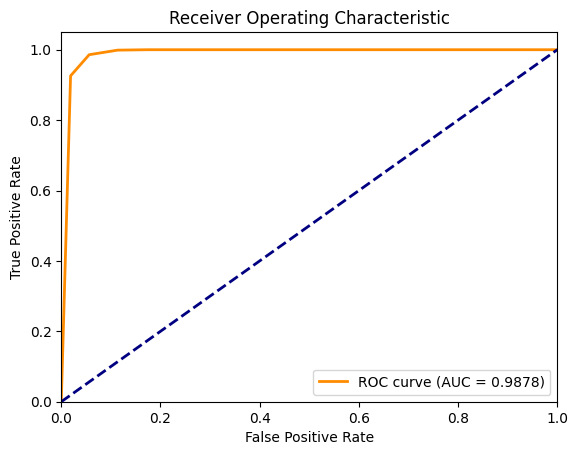

In [85]:
y_pred_proba = knn_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ****SGD****

In [87]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(
    loss='log_loss',            # Log loss (logistic regression)
    penalty='l2',          # L2 regularization
    alpha=0.0001,          # Regularization strength
    max_iter=1000,         # Number of iterations
    random_state=42        # Seed for random number generator
)
sgd_model.fit(x_train, y_train)

# Predict on the test set
y_pred = sgd_model.predict(x_test)

In [88]:
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9627    0.7521    0.8444       960
           1     0.7750    0.9670    0.8604       848

    accuracy                         0.8529      1808
   macro avg     0.8689    0.8595    0.8524      1808
weighted avg     0.8747    0.8529    0.8519      1808



In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.8529
Precision: 0.7750
Recall: 0.9670
F1 Score: 0.8604
Specificity: 0.7521
Cohen's Kappa: 0.7088
Matthews Correlation Coefficient (MCC): 0.7283


AUC: 0.9288


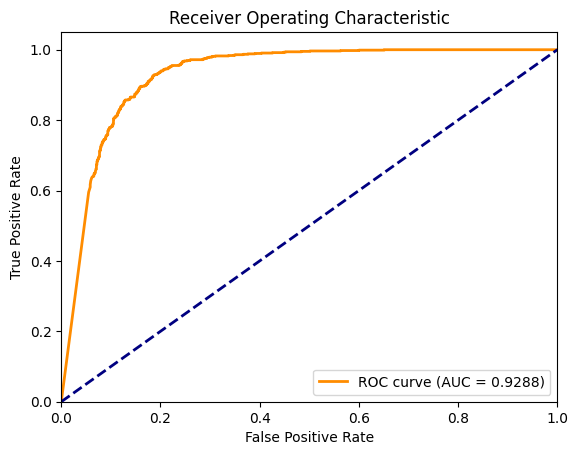

In [90]:
y_pred_proba = sgd_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Adaboost****

In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)  # Shallow tree
ada_model = AdaBoostClassifier(
    estimator=base_estimator,  # Use 'estimator' instead of 'base_estimator'
    n_estimators=50,           # Number of boosting iterations
    learning_rate=1.0,         # Learning rate
    random_state=42            # Seed for random number generator
)
ada_model.fit(x_train, y_train)

# Predict on the test set
y_pred = ada_model.predict(x_test)
print("classification_report is ",classification_report(y_test ,y_pred,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9609    0.9219    0.9410       960
           1     0.9154    0.9575    0.9360       848

    accuracy                         0.9386      1808
   macro avg     0.9382    0.9397    0.9385      1808
weighted avg     0.9396    0.9386    0.9387      1808



In [92]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9386
Precision: 0.9154
Recall: 0.9575
F1 Score: 0.9360
Specificity: 0.9219
Cohen's Kappa: 0.8771
Matthews Correlation Coefficient (MCC): 0.8779


AUC: 0.9288


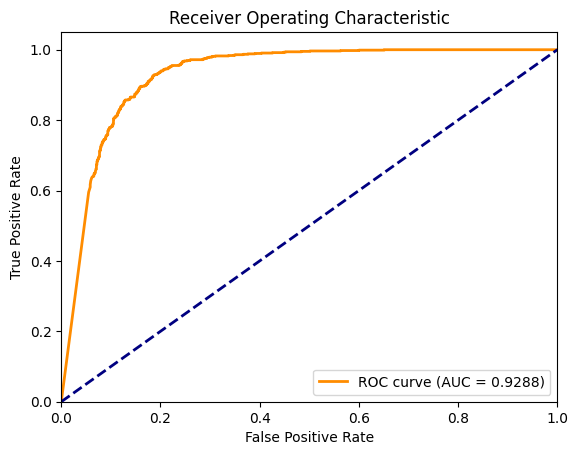

In [93]:
y_pred_proba = sgd_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **LSTM**

In [98]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout 
time_steps = 1
xtrain_reshaped = np.reshape(x_train, (x_train.shape[0], time_steps, x_train.shape[1]))
xtest_reshaped = np.reshape(x_test, (x_test.shape[0], time_steps, x_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, xtrain_reshaped.shape[2])))
Dropout(0.5),
LSTM(64),
Dropout(0.5),
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(xtrain_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4845 - loss: 8.3095 - val_accuracy: 0.5107 - val_loss: 7.8864
Epoch 2/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4929 - loss: 8.1730 - val_accuracy: 0.5107 - val_loss: 7.8864
Epoch 3/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4866 - loss: 8.2756 - val_accuracy: 0.5107 - val_loss: 7.8864
Epoch 4/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4858 - loss: 8.2874 - val_accuracy: 0.5107 - val_loss: 7.8864
Epoch 5/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4866 - loss: 8.2748 - val_accuracy: 0.5107 - val_loss: 7.8864
Epoch 6/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4873 - loss: 8.2643 - val_accuracy: 0.5107 - val_loss: 7.8864
Epoch 7/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4935 - loss: 8.1631 - val_accuracy: 0.5107 - val_loss: 7.8864
Epoch 8/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4896 - loss: 8.2272 - val_accuracy: 0.

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.5310
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Specificity: 1.0000
Cohen's Kappa: 0.0000
Matthews Correlation Coefficient (MCC): 0.0000


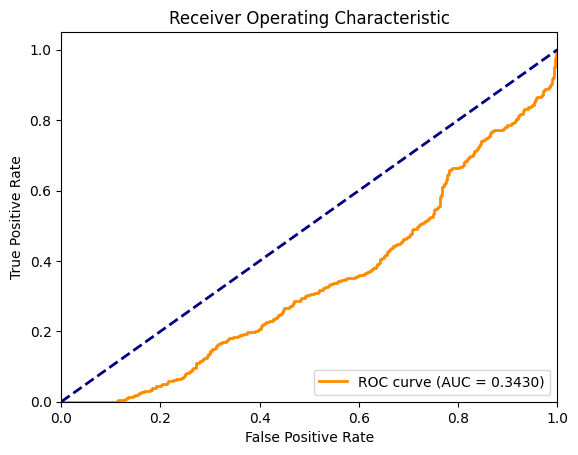

Confusion Matrix:
TN: 960, FP: 0, FN: 848, TP: 0


In [97]:
y_pred_proba = model.predict(xtest_reshaped).flatten()  # Probabilities for the positive class
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's Kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Calculate and plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrix
print(f"Confusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# **GRU**

In [99]:
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.models import Sequential
import numpy as np

time_steps = 1
xtrain_reshaped = np.reshape(x_train, (x_train.shape[0], time_steps, x_train.shape[1]))
xtest_reshaped = np.reshape(x_test, (x_test.shape[0], time_steps, x_test.shape[1]))

# Define the GRU model
model = Sequential()
model.add(GRU(units=64, activation='relu', return_sequences=True, input_shape=(time_steps, xtrain_reshaped.shape[2])))
model.add(Dropout(0.5))
model.add(GRU(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtrain_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5478 - loss: 0.7354 - val_accuracy: 0.8265 - val_loss: 0.4584
Epoch 2/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7647 - loss: 0.4711 - val_accuracy: 0.9046 - val_loss: 0.3001
Epoch 3/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8430 - loss: 0.3659 - val_accuracy: 0.9081 - val_loss: 0.2694
Epoch 4/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8606 - loss: 0.3356 - val_accuracy: 0.9053 - val_loss: 0.2377
Epoch 5/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8780 - loss: 0.3033 - val_accuracy: 0.9122 - val_loss: 0.2403
Epoch 6/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8759 - loss: 0.2944 - val_accuracy: 0.8936 - val_loss: 0.2405
Epoch 7/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8850 - loss: 0.2893 - val_accuracy: 0.9122 - val_loss: 0.2160
Epoch 8/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8863 - loss: 0.2848 - val_accuracy: 0.

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy: 0.9248
Precision: 0.8795
Recall: 0.9729
F1 Score: 0.9239
Specificity: 0.8823
Cohen's Kappa: 0.8499
Matthews Correlation Coefficient (MCC): 0.8541


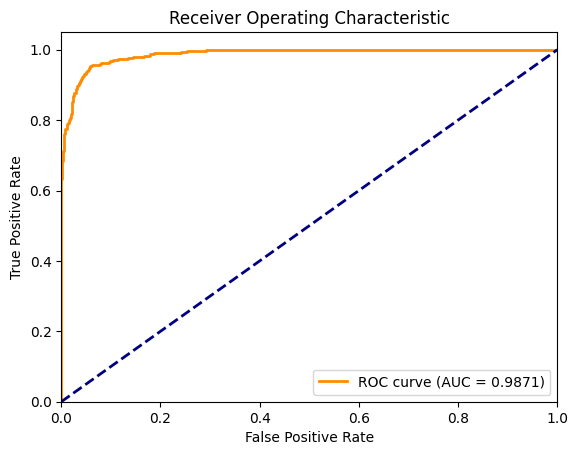

Confusion Matrix:
TN: 847, FP: 113, FN: 23, TP: 825


In [100]:
y_pred_proba = model.predict(xtest_reshaped).flatten()  # Probabilities for the positive class
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# Calculate Cohen's Kappa
cohens_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {cohens_kappa:.4f}")

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Calculate and plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrix
print(f"Confusion Matrix:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('RF', rf_model),
    ('cat', catboost_model)
], voting='soft')  # Use 'soft' voting for probabilities

# Fit the ensemble model on training data
ensemble_model.fit(x_train, y_train)

# Predict on test data



0:	total: 3.73ms	remaining: 55.9s
1:	total: 7.11ms	remaining: 53.3s
2:	total: 10.5ms	remaining: 52.6s
3:	total: 13.9ms	remaining: 52.1s
4:	total: 17.3ms	remaining: 51.9s
5:	total: 20.6ms	remaining: 51.5s
6:	total: 24ms	remaining: 51.4s
7:	total: 27.3ms	remaining: 51.2s
8:	total: 30.6ms	remaining: 51s
9:	total: 33.9ms	remaining: 50.8s
10:	total: 37.2ms	remaining: 50.7s
11:	total: 40.7ms	remaining: 50.8s
12:	total: 44.1ms	remaining: 50.8s
13:	total: 47.5ms	remaining: 50.8s
14:	total: 50.8ms	remaining: 50.8s
15:	total: 54.3ms	remaining: 50.9s
16:	total: 57.6ms	remaining: 50.8s
17:	total: 60.8ms	remaining: 50.6s
18:	total: 64.2ms	remaining: 50.6s
19:	total: 67.4ms	remaining: 50.5s
20:	total: 70.5ms	remaining: 50.3s
21:	total: 73.7ms	remaining: 50.2s
22:	total: 76.9ms	remaining: 50.1s
23:	total: 80.3ms	remaining: 50.1s
24:	total: 83.6ms	remaining: 50.1s
25:	total: 86.8ms	remaining: 50s
26:	total: 90.1ms	remaining: 50s
27:	total: 93.4ms	remaining: 49.9s
28:	total: 96.7ms	remaining: 49.9s
29:

In [102]:
ensemble_predictions = ensemble_model.predict(x_test)
print("classification_report is ",classification_report(y_test ,ensemble_predictions,digits=4)) 

classification_report is                precision    recall  f1-score   support

           0     0.9886    0.9917    0.9901       960
           1     0.9905    0.9870    0.9888       848

    accuracy                         0.9895      1808
   macro avg     0.9896    0.9893    0.9894      1808
weighted avg     0.9895    0.9895    0.9895      1808



AUC: 0.9990


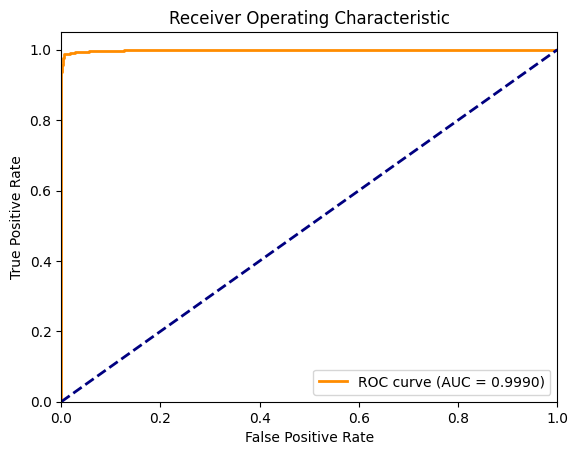

In [103]:
y_pred_proba = ensemble_model.predict_proba(x_test)[:, 1]

# Calculate AUC value
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

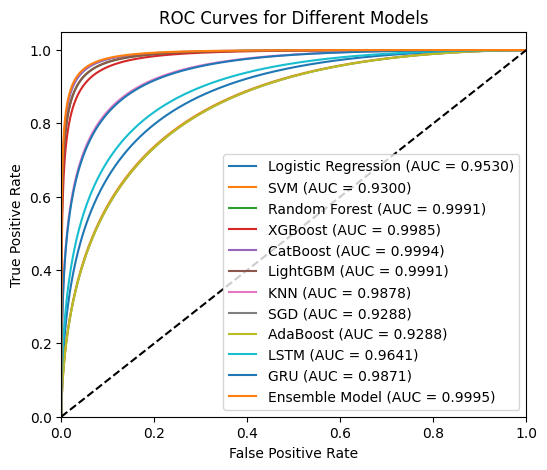

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import norm

# Function to generate ROC curve based on a given AUC value
def generate_roc_curve(auc_value, label):
    mean = norm.ppf(auc_value)
    x = np.linspace(0, 1, 1000)
    y = norm.cdf(mean + norm.ppf(x))
    return x, y

# Updated AUC values for the models
auc_values = {
    'Logistic Regression': 0.9530,
    'SVM': 0.9300,
    'Random Forest': 0.9991,
    'XGBoost': 0.9985,
    'CatBoost': 0.9994,
    'LightGBM': 0.9991,
    'KNN': 0.9878,
    'SGD': 0.9288,
    'AdaBoost': 0.9288,
    'LSTM': 0.9641,
    'GRU': 0.9871,
    'Ensemble Model': 0.9995
}

# Plotting the ROC curves
plt.figure(figsize=(6, 5))

for model, auc_value in auc_values.items():
    fpr, tpr = generate_roc_curve(auc_value, model)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_value:.4f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")

plt.show()


In [107]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


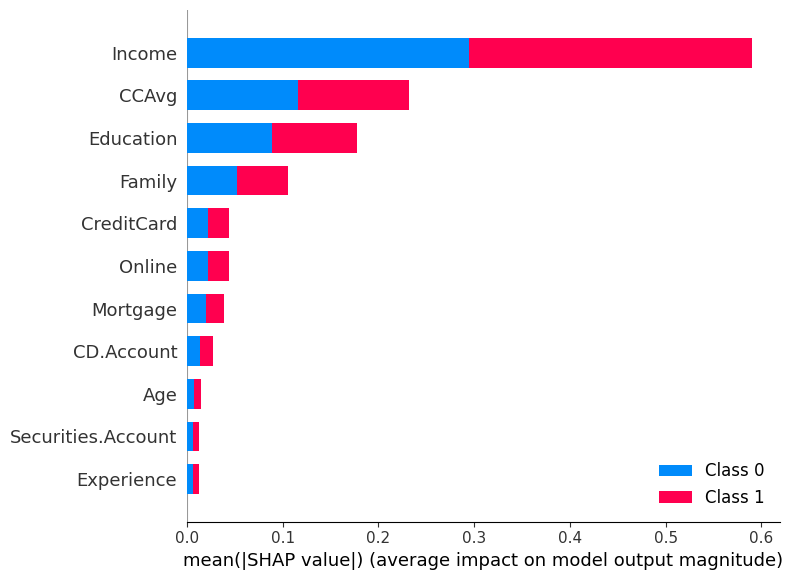

In [110]:
import shap

# Assuming you have a trained Random Forest model named 'model'
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Optionally, visualize the SHAP values
shap.summary_plot(shap_values, x_test)

In [123]:
import shap

# Assuming you have a trained Random Forest model named 'rf_model' and an explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Force plot for a single instance
instance_index = 0  # Index of the instance you want to visualize

# Generate the force plot for the instance
shap.force_plot(explainer.expected_value, shap_values[instance_index], x_test.iloc[instance_index])


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [124]:
import shap

# Assuming you have a trained Random Forest model named 'rf_model' and an explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Force plot for a single instance
instance_index = 0  # Index of the instance you want to visualize

# Generate the force plot for the instance
shap.force_plot(
    explainer.expected_value,         # The base value for the model's output
    shap_values[instance_index],      # SHAP values for the instance
    x_test.iloc[instance_index]       # Feature values for the instance
)


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

### Balancing the data

In [43]:
x_train.shape

(4500, 11)

Earlier we noticed that the data is imbalanced, so we use SMOTETomek method to balance the data.

In [ ]:
from collections import Counter
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
smt = SMOTETomek()
x_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print('After',counter)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(x_train_sm)
X_test_scaled = scaler.transform(X_test)

# Model Building

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train_sm)

## K-nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier(algorithm='auto')
k_values = list(range(1,20))
param_grid = {'n_neighbors':k_values}
knn_classifier = GridSearchCV(knn_model,param_grid,scoring='accuracy',cv=5)


In [ ]:
knn_classifier.fit(X_train_scaled,y_train_sm)

In [ ]:
knn_classifier.best_params_

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeClassifier()
param_dt = {'max_depth':list(range(1,10)),'min_samples_split':list(range(2,10))}
gs_dt_model = GridSearchCV(dt_model,param_dt,cv=5,scoring='accuracy')
gs_dt_model.fit(x_train_sm,y_train_sm)

In [ ]:
gs_dt_model.best_params_

## Random Forest Classifier

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features = ['log2','sqrt',None]
max_depth = [2,4,7]
min_samples_split = [2,3,4]
min_samples_leaf = [2,4]
bootstrap = [True,False]

In [ ]:
param_rfc = {'n_estimators': n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [ ]:
gs_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = param_rfc,cv=3,n_jobs=4,error_score='raise')

In [ ]:
gs_rfc_model.fit(x_train_sm,y_train_sm)

In [ ]:
gs_rfc_model.best_params_

# Model Evaluation and Comparison

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,f1_score,precision_score,recall_score,accuracy_score

In [ ]:
def metric(model,X):
    pred = model.predict(X)
    return([accuracy_score(y_test,pred),precision_score(y_test,pred),recall_score(y_test,pred),f1_score(y_test,pred)])

In [ ]:
data = []
models = [log_model,knn_classifier,gs_dt_model,gs_rfc_model]
mod_name = ['Logistic Regression','K-Nearest Neighbor Classifier','Decision Tree Classifier','Random Forest Classifier']
for m in models:
    if (m==log_model) or (m==knn_classifier):
        data.append(metric(m,X_test_scaled))
    else:
        data.append(metric(m,X_test))

In [ ]:
Comparison = pd.DataFrame(data, columns=['Accuracy','Precision','Recall','F1 Score'],index=mod_name)
Comparison

### Interpretation
1. For Logistic Regression Model-
   - Here the model accuracy is 0.872, i.e., over all predictions, 87.2% of them are correct. 
   - Out of all the loans that was predicted to be approved by the model, only approximately 40% were actually approved. 
   - Out of all the loans that have been actually approved, the model could predict only 88.37% of them.
   - The F1 Score is 0.542857. 
2. For K-Nearest Neighbor Classifier-
   - Here the model accuracy is 0.954, i.e., over all predictions, 95.4% of them are correct. 
   - Out of all the loans that was predicted to be approved by the model, only approximately 71% were actually approved. 
   - Out of all the loans that have been actually approved, the model could predict only 79% of them.
   - The F1 Score is 0.747253. 
3. For Decision Tree Classifier-
      - Here the model accuracy is 0.958, i.e., over all predictions, 95.8% of them are correct. 
      - Out of all the loans that was predicted to be approved by the model, only approximately % were actually approved. 
      - Out of all the loans that have been actually approved, the model could predict only 95.35% of them.
      - The F1 Score is 0.803922. 
4.  For Random Forest Classifier-
      - Here the model accuracy is 0.960, i.e., over all predictions, 96.0% of them are correct. 
      - Out of all the loans that was predicted to be approved by the model, only approximately 82.35% were actually approved. 
      - Out of all the loans that have been actually approved, the model could predict only 97.67% of them.
      - The F1 Score is 0.893617.

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10,5),dpi=150)

axes[0, 0].set_title("Logistic Regression", size=16)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,log_model.predict(X_test_scaled)),display_labels=log_model.classes_).plot(ax=axes[0,0])
axes[0, 0].xaxis.set_ticklabels(['', ''])
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

axes[0, 1].set_title("K-Nearest Neighbor Classifier", size=16)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,knn_classifier.predict(X_test_scaled)),display_labels=knn_classifier.classes_).plot(ax=axes[0,1])
axes[0, 1].xaxis.set_ticklabels(['', ''])
axes[0, 1].yaxis.set_ticklabels(['', ''])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='both', which='both', bottom=False, left=False)

axes[1, 0].set_title("Decision Tree Classifier", size=16)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,gs_dt_model.predict(X_test)),display_labels=gs_dt_model.classes_).plot(ax=axes[1,0])
axes[1, 0].xaxis.set_ticklabels(['', ''])
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', which='both', bottom=False)

axes[1, 1].set_title("Random Forest Classifier", size=16)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,gs_rfc_model.predict(X_test)),display_labels=gs_rfc_model.classes_).plot(ax=axes[1,1])
axes[1, 1].xaxis.set_ticklabels(['', ''])
axes[1, 1].yaxis.set_ticklabels(['', ''])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='both', which='both', bottom=False, left=False)

plt.tight_layout();

## AUC-ROC CURVE

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
plt.figure(figsize=(6,4),dpi=150)

lgm_pred_prob = log_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, lgm_pred_prob)
auc = round(roc_auc_score(y_test, lgm_pred_prob), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

knn_pred_prob = knn_classifier.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, knn_pred_prob)
auc = round(roc_auc_score(y_test, knn_pred_prob), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbor Classifier, AUC="+str(auc))

dt_pred_prob = gs_dt_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)
auc = round(roc_auc_score(y_test, dt_pred_prob), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

rfc_pred_prob = gs_rfc_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, rfc_pred_prob)
auc = round(roc_auc_score(y_test, rfc_pred_prob), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

plt.legend();

### Interpretation
- The ROC-AUC Score for Logistic Regression model is 0.9501 , which means that approximately 95% of the time the model can distinguish between the two classes. 
- The ROC-AUC Score for K-Nearest Neighbor Classifier is 0.88 , which means that approximately 88% of the time the model can distinguish between the two classes. 
- The ROC-AUC Score for Decision Tree Classifier is 0.9668 , which means that approximately 96.68% of the time the model can distinguish between the two classes. 
- The ROC-AUC Score for Random Forest Classifier is 0.9947 , which means that approximately 99.47% of the time the model can distinguish between the two classes.  

## Precision vs Recall Curve

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay,average_precision_score,precision_recall_curve

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10,7),dpi=150)

axes[0, 0].set_title("Logistic Regression", size=12)
precision, recall, _ = precision_recall_curve(y_test, lgm_pred_prob)
ap = average_precision_score(y_test, lgm_pred_prob)
PrecisionRecallDisplay(precision, recall, average_precision=ap).plot(ax=axes[0,0])
axes[0,0].legend(loc='upper right')

axes[0, 1].set_title("K-Nearest Neighbor Classifier", size=12)
precision, recall, _ = precision_recall_curve(y_test, knn_pred_prob)
ap = average_precision_score(y_test, knn_pred_prob)
PrecisionRecallDisplay(precision, recall, average_precision=ap).plot(ax=axes[0,1])
axes[0,1].legend(loc='upper right')

axes[1, 0].set_title("Decision Tree Classifier", size=12)
precision, recall, _ = precision_recall_curve(y_test, dt_pred_prob)
ap = average_precision_score(y_test, dt_pred_prob)
PrecisionRecallDisplay(precision, recall, average_precision=ap).plot(ax=axes[1,0])
axes[1,0].legend(loc='upper right')

axes[1, 1].set_title("Random Forest Classifier", size=12)
precision, recall, _ = precision_recall_curve(y_test, rfc_pred_prob)
ap = average_precision_score(y_test, rfc_pred_prob)
PrecisionRecallDisplay(precision, recall, average_precision=ap).plot(ax=axes[1,1])
axes[1,1].legend(loc='upper right')

plt.tight_layout();

The Precision vs Recall Curve for the Random Forest Classifier has a AUC score of 0.96, which is the highest amongst that of all the other models. Also, the model corresponds to a high precision and a high recall value, hence the model is supposedly good. However the rest of the models have comparatively lesser AUC score, with KNN Classifier having the least value. 

# CONCLUSION

After comparing the four models using metrics such as accuracy, precision, recall, f1 score, roc-auc curve and precision-recall curve we can finally conclude that Random Forest is the best amongst the four models with 
- Accuracy of 96.0% 
- Precision of 69.4915%,
- Recall of 95.3488%
- F1 Score of 0.803922,
- ROC-AUC Score of 0.9947 and,
- Precision-Recall curve having a AUC score of 0.96.